<a href="https://colab.research.google.com/github/PanciSaigo/PytorchRookie/blob/main/Pytorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network Intro


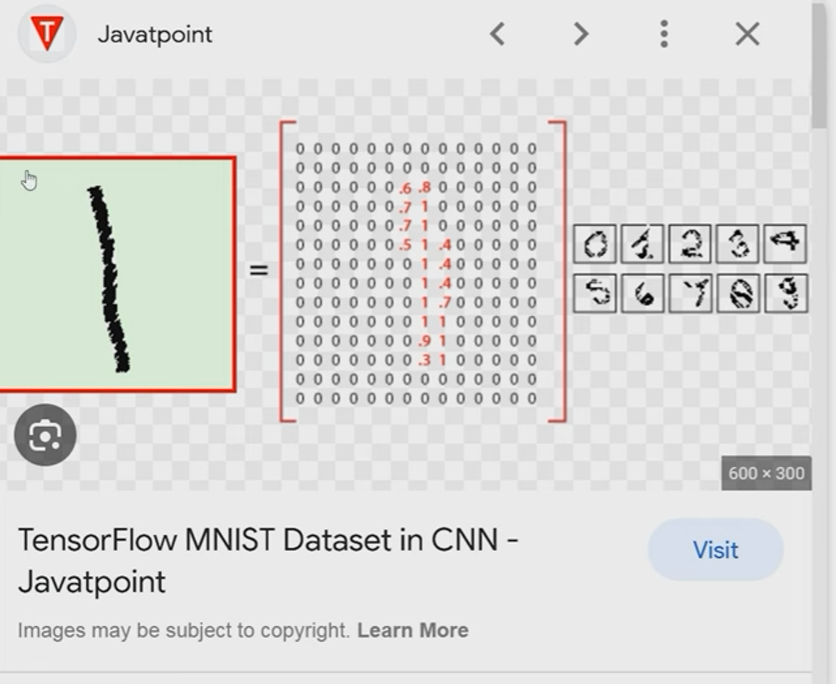

A **Convolutional Neural Network (CNN)** is a type of deep learning model, particularly effective for image processing tasks. It is designed to automatically and adaptively learn spatial hierarchies of features from input images, making it ideal for tasks like image classification, object detection, and recognition.

Key components of a CNN:

1. **Convolutional Layers**: These layers apply filters (or kernels) that slide over the input data to extract important features like edges, textures, and patterns. The convolution operation reduces the size of the input and highlights key aspects of the image.

2. **Pooling Layers**: These layers reduce the spatial dimensions (width and height) of the feature maps, making the computation more efficient and reducing overfitting. Common pooling methods include Max Pooling and Average Pooling.

3. **Fully Connected Layers**: These are regular neural network layers that take the high-level features learned by the convolutional and pooling layers and use them to perform the final classification or prediction task.

4. **Activation Functions**: Non-linear functions like ReLU (Rectified Linear Unit) are applied after convolutional operations to introduce non-linearity, which allows the network to learn complex patterns.

5. **Dropout**: A regularization technique to prevent overfitting by randomly "dropping" neurons during training.

CNNs are widely used in computer vision tasks but can be applied to other domains with structured data as well.

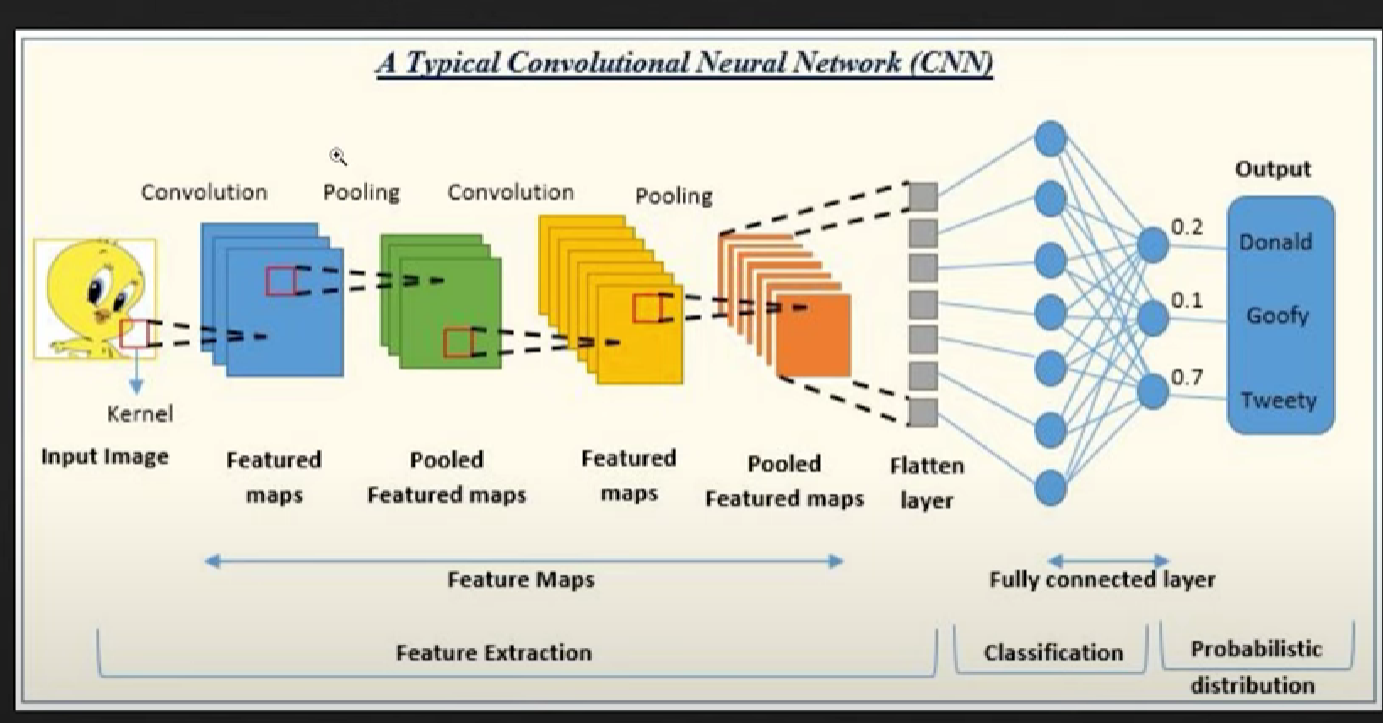

Sure! Here’s a brief explanation of the **Convolutional** and **Pooling Layers** in a CNN:

### 1. **Convolutional Layer**:
   - **Purpose**: The convolutional layer is responsible for extracting features from the input data (e.g., edges, textures, shapes in images).
   - **How it works**: A small filter (or kernel) slides over the input image or feature map and performs element-wise multiplication with the region it covers, followed by summing up the results. This produces a feature map that highlights the presence of certain features in different parts of the input.
   - **Filters**: The filter size is typically much smaller than the input (e.g., 3x3 or 5x5). Multiple filters can be applied to capture different features.
   - **Key Point**: Each filter learns to detect a specific pattern (like edges or corners) in the data.

### 2. **Pooling Layer**:
   - **Purpose**: The pooling layer reduces the spatial size of the feature maps, making the network computationally efficient and more resistant to overfitting.
   - **How it works**: Pooling takes a small region (e.g., 2x2 or 3x3) from the feature map and outputs a single value, usually the maximum value (**Max Pooling**) or the average value (**Average Pooling**) in that region.
   - **Max Pooling**: Picks the maximum value from the selected region, preserving the most prominent feature.
   - **Effect**: This downsampling operation reduces the dimensionality of the data while retaining important features, making the model faster and more generalizable.

In essence, the **convolutional layer** detects features, while the **pooling layer** simplifies the data and makes the network more efficient.

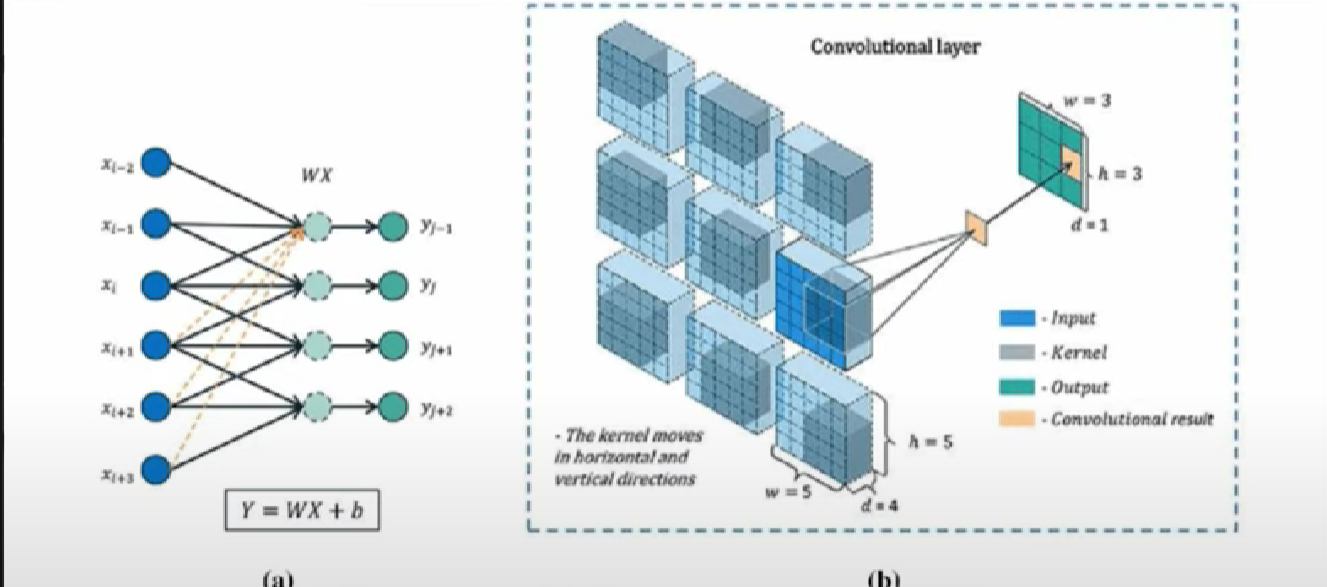

**Local connectivity** in a Convolutional Neural Network (CNN) refers to the concept that each neuron in a convolutional layer is connected only to a small, localized region of the input data, rather than to the entire input, as in fully connected layers.

Here’s a breakdown of the concept:

### 1. **Receptive Field**:
   - In CNNs, each neuron (or unit) in the convolutional layer only looks at a **small region** of the input image, called its **receptive field**.
   - For example, if the receptive field is 3x3, each neuron will "see" and process only a 3x3 region of the image, instead of the entire image.
   - This localized connectivity allows the CNN to focus on small, spatially coherent features, such as edges or textures, in that part of the image.

### 2. **Shared Weights (Filters)**:
   - The same set of weights (known as a **filter** or **kernel**) is applied across different parts of the image through convolution. This means that the CNN is looking for the same pattern (like an edge or a corner) across the entire image but only in local patches at a time.
   - This leads to **translation invariance**, meaning that the CNN can detect features like edges no matter where they appear in the image.

### 3. **Spatial Hierarchy**:
   - By stacking multiple convolutional layers, the CNN gradually captures larger and more complex patterns. The lower layers focus on small, local features (like edges), while the higher layers capture larger patterns (like shapes or objects) formed by these small features.

### Benefits of Local Connectivity:
   - **Efficiency**: Since neurons are connected to only small regions of the input, the number of parameters to learn is drastically reduced compared to fully connected layers.
   - **Spatial Structure**: CNNs preserve the spatial relationships between pixels by focusing on local regions, making them particularly effective for image-related tasks.

In summary, local connectivity allows CNNs to capture local patterns and learn spatial hierarchies of features with fewer parameters, making them efficient and powerful for tasks involving structured data like images.

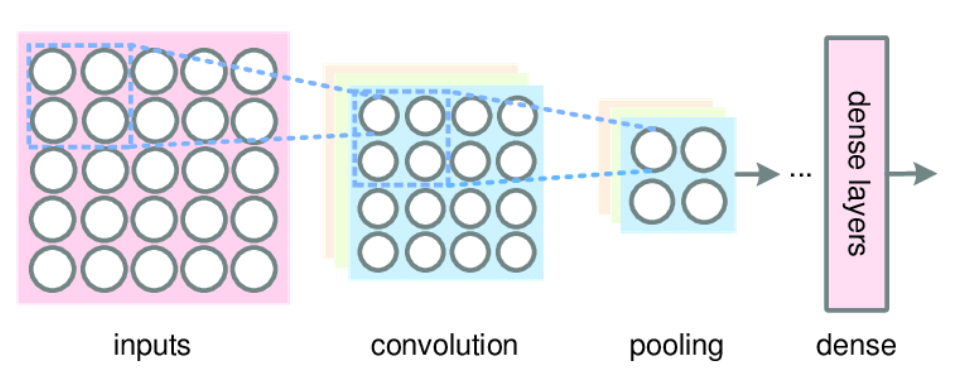

# Max Pooling
The operations of the max pooling is quite simple since there are only two hyperparameters used, which are filter size
(
f
)
 and stride
(
s
)
. Notice that we usually assume there is no padding in pooling layers, that is
p
=
0
. Then we will illustrate two max pooling examples where
f
=
2
,
s
=
2
 and
f
=
3
,
s
=
1
 to demonstrate the process of the max pooling.

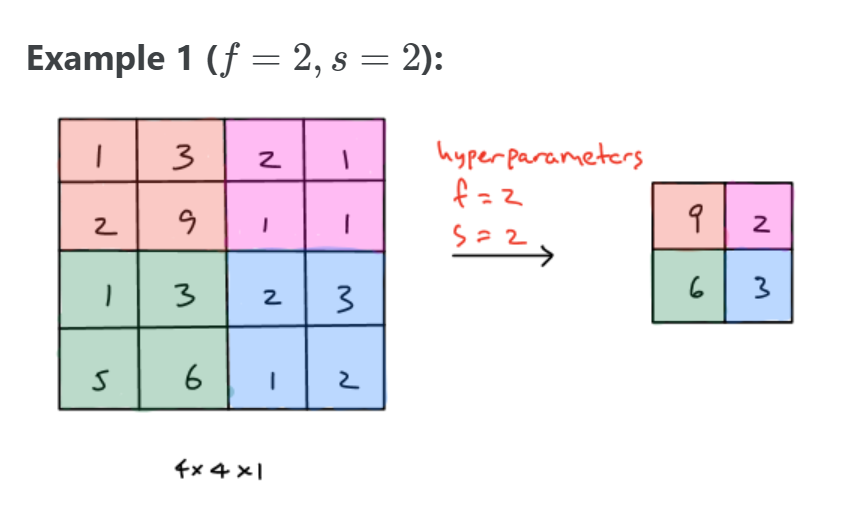

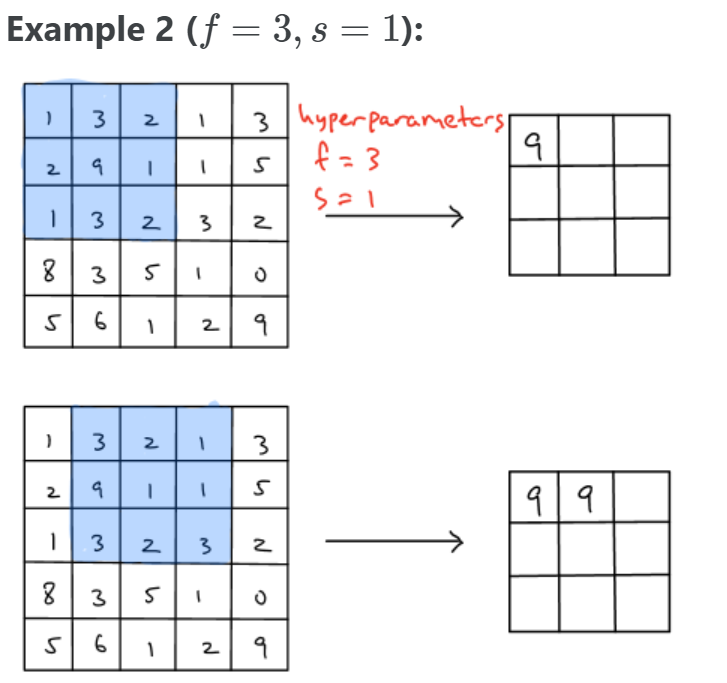

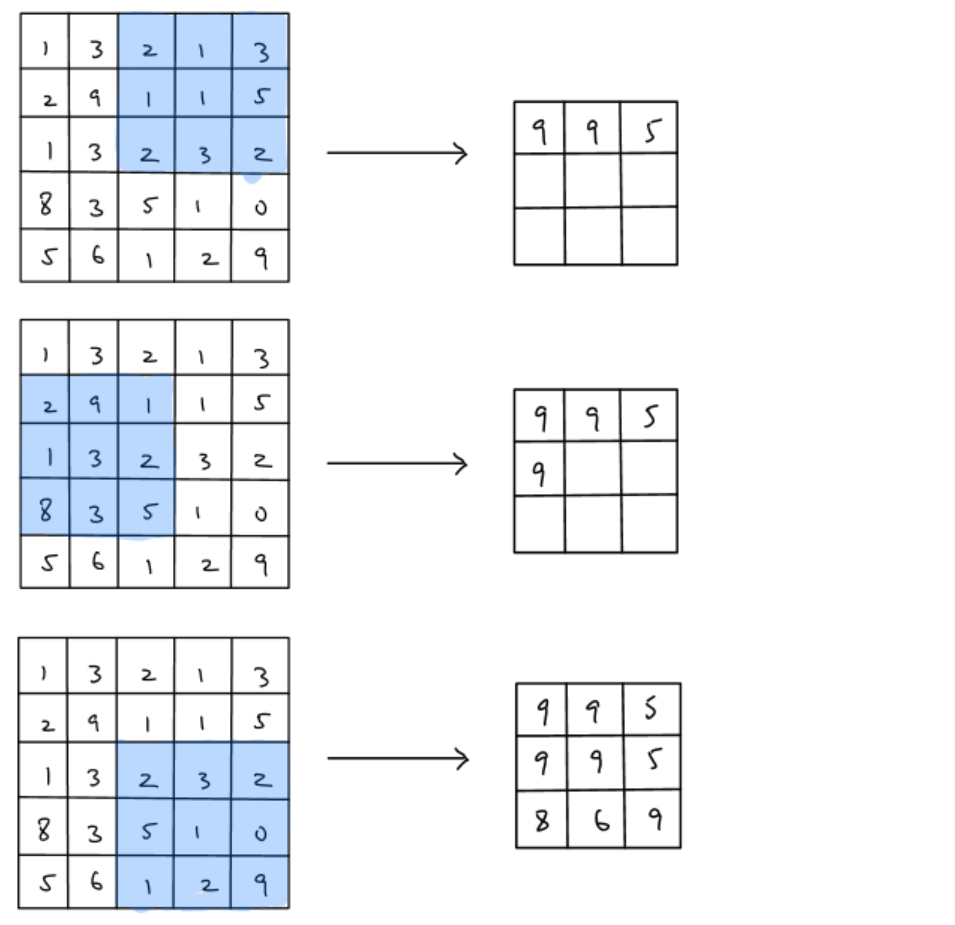

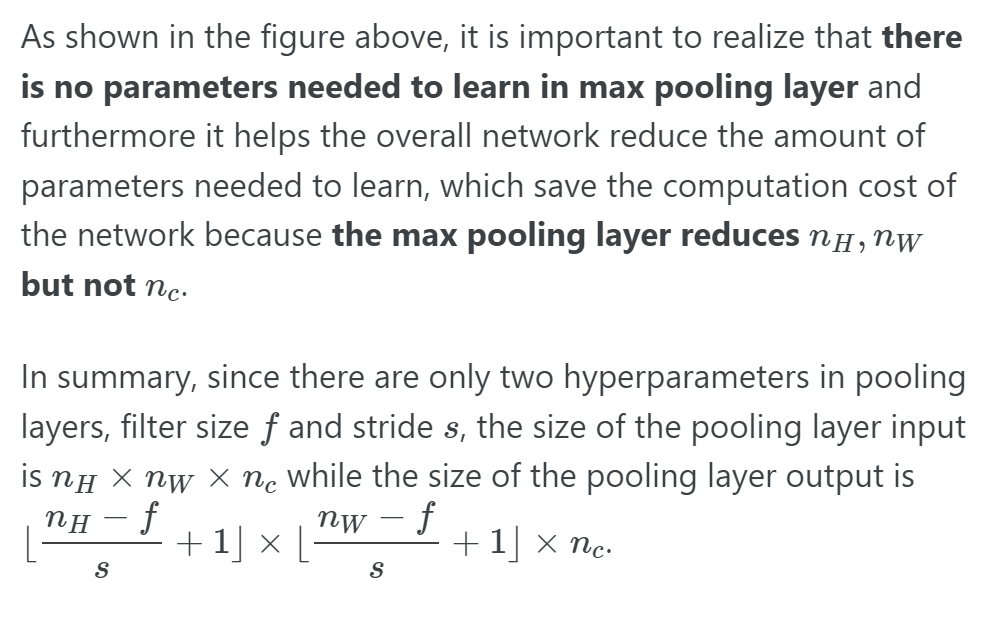

#Coding

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Convert MNIST image file into a Tensor of 4-Dimensions (# of images, Height, Width, Color, Channels)
transform = transforms.ToTensor()


In [ ]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)



In [ ]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
pwd #show directory

'/content'

In [ ]:
ls

sample_data/


In [ ]:
# Create a small batch size for images...let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [ ]:
# Define our CNN model
# Describe Convolutional layer and what it's doing  (2 convolutional layers)
# This is just a example then we will built actual model
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)



In [ ]:
# Grab 1 MNIST recod/image
for i, (X_Train, y_train) in enumerate(train_data):
  break


In [ ]:
X_Train.shape  # shows 1 image 28x28 pixels

torch.Size([1, 28, 28])

In [ ]:
x = X_Train.view(1,1,28,28)

In [ ]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our ctivation function


In [ ]:
x

tensor([[[[0.1430, 0.1430, 0.1430,  ..., 0.1430, 0.1430, 0.1430],
          [0.1430, 0.1430, 0.1430,  ..., 0.1430, 0.1430, 0.1430],
          [0.1430, 0.1430, 0.1430,  ..., 0.1430, 0.1430, 0.1430],
          ...,
          [0.1430, 0.1430, 0.0714,  ..., 0.1430, 0.1430, 0.1430],
          [0.1430, 0.1430, 0.2904,  ..., 0.1430, 0.1430, 0.1430],
          [0.1430, 0.1430, 0.1430,  ..., 0.1430, 0.1430, 0.1430]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [ ]:
# 1 single image, 6 is the filters we asked for, 26x26 the size is reduced due to padding setting
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
# pass through Pooling Layer
x = F.max_pool2d(x,2,2) # kernal size of 2 and stride of 2

In [ ]:
x.shape #26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [ ]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [ ]:
x.shape  # image of 1 features of 16 , again we didn't set padding so we lose 2 pixels outside the image

torch.Size([1, 16, 11, 11])

In [ ]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape # 11 / 2 = 5.5 But we have to round it down, because we can't invent data to round it up

torch.Size([1, 16, 5, 5])



---



# Convolutional Neural Network Model

In [ ]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1) #first paramter is input then output then kernal and stride
    self.conv2 = nn.Conv2d(6,16,3,1)
    #Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2

    # Re-View to flatten it out
    X = X.view(-1,16*5*5) #negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)



In [ ]:
# Create an instance of our Model
torch.manual_seed(88)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001 ) # smaller learning rate, longer it takes

**Trianing**

In [ ]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
    trn_corr += batch_corr # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.6223284602165222
Epoch: 0  Batch: 1200  Loss: 0.016671551391482353
Epoch: 0  Batch: 1800  Loss: 0.05864585563540459
Epoch: 0  Batch: 2400  Loss: 0.007683029863983393
Epoch: 0  Batch: 3000  Loss: 0.14938445389270782
Epoch: 0  Batch: 3600  Loss: 0.23884668946266174
Epoch: 0  Batch: 4200  Loss: 0.12701204419136047
Epoch: 0  Batch: 4800  Loss: 0.005737170111387968
Epoch: 0  Batch: 5400  Loss: 0.018366873264312744
Epoch: 0  Batch: 6000  Loss: 0.20920617878437042
Epoch: 1  Batch: 600  Loss: 0.16970932483673096
Epoch: 1  Batch: 1200  Loss: 0.036326296627521515
Epoch: 1  Batch: 1800  Loss: 0.021127281710505486
Epoch: 1  Batch: 2400  Loss: 0.004679473582655191
Epoch: 1  Batch: 3000  Loss: 0.0006304803537204862
Epoch: 1  Batch: 3600  Loss: 0.007901687175035477
Epoch: 1  Batch: 4200  Loss: 0.004502535797655582
Epoch: 1  Batch: 4800  Loss: 0.04735720530152321
Epoch: 1  Batch: 5400  Loss: 0.00624151062220335
Epoch: 1  Batch: 6000  Loss: 0.001939505571499467
Epoch: 2  B